## Positive Degree Days

[Calov and Greeve (2005)](https://www.cambridge.org/core/journals/journal-of-glaciology/article/semianalytical-solution-for-the-positive-degreeday-model-with-stochastic-temperature-variations/6FD568E1D92AA7B21C25E34B012790E1): 
$$
PDD = \int\limits_{0}^{A} \left[ 
\frac{\sigma}{\sqrt{2\pi}} 
\exp \left(  -\frac{T_{\rm ac}(t)^2}{2\sigma^2}\right) 
+ \frac{T_{\rm ac}(t)}{2}  \rm{erfc}  \left( -\frac{T_{\rm ac}(t)}{\sqrt{2}\sigma} \right)
 \right] \rm{d} t
$$

In [1]:
import sys
import numpy as np 
import scipy.special as sp
import matplotlib.pyplot as plt 

sys.path.append('../../src/thermal')

from utils import * 

def classic_PDDs(T, T_m=0.0): 
    return np.greater(T, T_m) * T

def clavo_greev_PDDs(T, σ=0.0): 
    import scipy.special as sp

    with np.errstate(divide='ignore', invalid='ignore'):
        T_norm = T / (np.sqrt(2)*σ) 
        
    clavo_greev = σ / np.sqrt(2*np.pi) * np.exp(-T_norm**2) + T/2*sp.erfc(-T_norm)
    
    return clavo_greev

def wilson_PDDs(T, α_daily=-3.0):

    root = -T/α_daily
    
    
    a = np.where((-1 <= root) & (root <= 1), np.arcsin(root), np.pi/2)
    b = np.where((-1 <= root) & (root <= 1), np.pi - a,       np.pi/2)
    
    wilson_PDDs = 1/(2*np.pi) * (α_daily*(np.cos(a) - np.cos(b)) + T * (b-a))
    
    # if the root is less than -1.0, then the daily sinusiod 
    # is positive enough that it never dips below zero. 
    # therefore PDD for that day is just equal to mean daily air temp
    return  np.where((-1 > root), T, wilson_PDDs)

In [2]:
# default air temperature parameters from KMR data
temp_params = dict(α       = 10.8, 
                   dTdz    = 6.5E-3, 
                   z_ref   = 2193.0, 
                   T_mean  = -6.02, 
                   T_peak  = 196, 
                   T_σ     = ( 8.29376332e-05, -3.45256005e-02, 6.31076200e+00))

# initialize the AirTemp class with the default parameters
AirTemp  = surface_AirTemp(**temp_params)

In [3]:
doy, dt = np.linspace(0,365, 1*366, retstep=True)
Z    = np.linspace(2000,3000)
std  = np.polyval(temp_params['T_σ'], doy)[:,None]

# temp = AirTemp(Z, T_σ=0.0)
temp = AirTemp(Z, doy=doy)

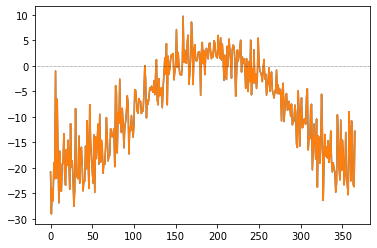

In [4]:
plt.plot(doy, temp.mean(1) + np.sin(doy*2*np.pi)); 
plt.plot(doy, temp.mean(1)); 

plt.axhline(0.0, ls=':', lw=0.5, c='k')

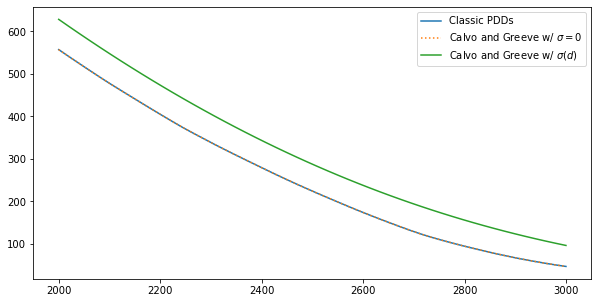

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(Z, classic_PDDs(temp).sum(0)*dt, 
       label='Classic PDDs')

ax.plot(Z, clavo_greev_PDDs(temp, σ=0.0).sum(0)*dt, 
       label=r'Calvo and Greeve w/ $\sigma=0$', 
       ls = ':')

ax.plot(Z, clavo_greev_PDDs(temp, σ=std).sum(0)*dt, 
       label=r'Calvo and Greeve w/ $\sigma(d)$')

ax.legend()

/Users/andrewnolan/anaconda3/envs/thermal/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in arcsin


Text(0, 0.5, 'Mean Air Temperature [$^\\circ$ C]')

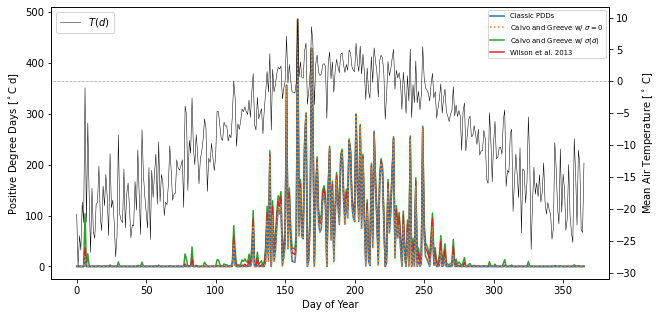

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(doy, classic_PDDs(temp).sum(1)*dt, 
       label='Classic PDDs')
ax.plot(doy, clavo_greev_PDDs(temp, σ=0.0).sum(1)*dt, 
       label=r'Calvo and Greeve w/ $\sigma=0$', 
       ls = ':')
ax.plot(doy, clavo_greev_PDDs(temp, σ=std).sum(1)*dt, 
       label=r'Calvo and Greeve w/ $\sigma(d)$', 
       zorder=0)

ax.plot(doy, wilson_PDDs(temp, 3.0).sum(1)*dt, 
       label=r'Wilson et al. 2013 ', 
       zorder=0)

ax.legend(fontsize='x-small')


ax2 = ax.twinx()

ax2.plot(doy, temp.mean(1), 
         label='$T(d)$', c='k', lw=0.5)

ax2.axhline(0.0, ls=':', c='k', lw=0.5)

ax2.legend(loc=2)



ax.set_xlabel('Day of Year')
ax.set_ylabel('Positive Degree Days [$^\circ$C d]')
ax2.set_ylabel('Mean Air Temperature [$^\circ$ C]')

In [7]:
print(np.nansum(wilson_PDDs(temp, 3.0))*dt)
print(classic_PDDs(temp).sum()*dt)
print(clavo_greev_PDDs(temp).sum()*dt)
print(clavo_greev_PDDs(temp, σ=std).sum()*dt)

14126.214059739119
12486.232331081896
12486.232331081896
15681.0687079122


/Users/andrewnolan/anaconda3/envs/thermal/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in arcsin


In [8]:
doy, dt = np.linspace(0,365, 20*366, retstep=True)
Z    = np.linspace(2000,3000)
std  = np.polyval(temp_params['T_σ'], doy)[:,None]

# initialize the AirTemp class with the default parameters
AirTemp  = surface_AirTemp(**temp_params)
temp = AirTemp(Z, doy=doy, T_σ=0.0)

/Users/andrewnolan/anaconda3/envs/thermal/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in arcsin


Text(0, 0.5, 'Mean Air Temperature [$^\\circ$ C]')

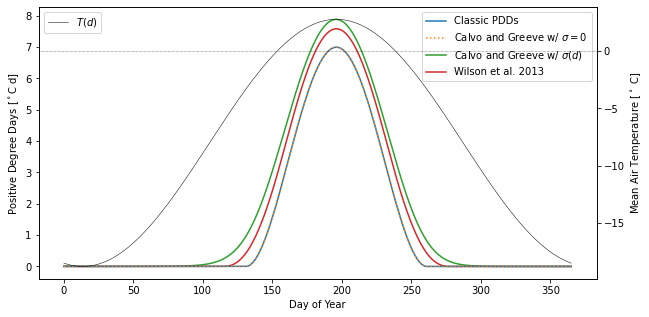

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(doy, classic_PDDs(temp).sum(1)*dt, 
       label='Classic PDDs')
ax.plot(doy, clavo_greev_PDDs(temp, σ=0.0).sum(1)*dt, 
       label=r'Calvo and Greeve w/ $\sigma=0$', 
       ls = ':')
ax.plot(doy, clavo_greev_PDDs(temp, σ=std).sum(1)*dt, 
       label=r'Calvo and Greeve w/ $\sigma(d)$', 
       zorder=0)

ax.plot(doy, wilson_PDDs(temp, 3.0).sum(1)*dt, 
       label=r'Wilson et al. 2013 ', 
       zorder=0)

ax.legend( facecolor='w')


ax2 = ax.twinx()

ax2.plot(doy, temp.mean(1), 
         label='$T(d)$', c='k', lw=0.5)

ax2.axhline(0.0, ls=':', c='k', lw=0.5)

ax2.legend(loc=2)



ax.set_xlabel('Day of Year')
ax.set_ylabel('Positive Degree Days [$^\circ$C d]')
ax2.set_ylabel('Mean Air Temperature [$^\circ$ C]')

In [10]:
print(wilson_PDDs(temp, 3.0).sum()*dt)
print(classic_PDDs(temp).sum()*dt)
print(clavo_greev_PDDs(temp).sum()*dt)
print(clavo_greev_PDDs(temp, σ=std).sum()*dt)

11443.36026419286
9440.453719166671
9440.453719166671
12889.910546265672


/Users/andrewnolan/anaconda3/envs/thermal/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in arcsin


In [11]:
# def clavo_greev_PDDs(T, σ=0.0): 
#     import scipy.special as sp

#     with np.errstate(divide='ignore', invalid='ignore'):
#         T_norm = T / (np.sqrt(2)*σ) 
        
#     # clavo_greev = σ / np.sqrt(2*np.pi) * np.exp(-T_norm**2) + T/2*sp.erfc(-T_norm)
#     clavo_greev = T_norm
#     return clavo_greev

Couple PDDs to KMR results? 

In [12]:
from scipy import interpolate

# load South Glacier geometry 
glc1a_x  = np.loadtxt('../../input_data/topography/glc1-a_surf.dat')[:,0]
glc1a_zs = np.loadtxt('../../input_data/topography/glc1-a_surf.dat')[:,1]
glc1a_zb = np.loadtxt('../../input_data/topography/glc1-a_bed.dat' )[:,1]

# load KMR mass balance results
kmr_coefs = np.loadtxt("../../input_data/mass_balance/KMR_MB_k_2_s_2500_coefs.dat")
kmr_knots = np.loadtxt("../../input_data/mass_balance/KMR_MB_k_2_s_2500_knots.dat")

# pack up the knots and coefs into tck tuple
kmr_tck = (kmr_knots, kmr_coefs, 2)
# predict the mass balance from the kmr spline
kmr_mb  = interpolate.splev(glc1a_zs, kmr_tck)

In [179]:
doy, dt = np.linspace(0,365, 365, retstep=True)

std  = np.polyval(temp_params['T_σ'], doy)[:,None]

# initialize the AirTemp class with the default parameters
AirTemp  = surface_AirTemp(**temp_params)
temp     = AirTemp(glc1a_zs, doy=doy, T_σ=0.0)

glc1a_PDDs = clavo_greev_PDDs(temp, std) #units:[C+ d] [365, NX]

daily_melt  = 8e-3 * glc1a_PDDs
yearly_melt = daily_melt.sum(0)

yearly_accum = kmr_mb + yearly_melt
daily_accum  = yearly_accum * (np.ones((365,1))/365)

In [168]:
# thick     = 10.0 #[m]
# thick_ref = 10.0
# # pick an index of interest
# idx = 600 

# # get the nodal metl and accumulation
# nodal_PDDs  = glc1a_PDDs[:, idx]
# nodal_melt  = daily_melt[:,idx]
# nodal_accum = daily_accum[:, idx]

# # yealry ammount of snow on the surface
# yearly_snow = np.maximum((nodal_accum - nodal_melt).sum(), 0.0)


# for i in range(0,365): 
    
#     daily_snow = np.maximum(yearly_snow + nodal_accum[i] - nodal_melt[i], 0.0)
    
#     old_zsurf      = glc1a_zs[idx] + (thick-thick_ref)

#     # Calculate the new thickness [m] based on the mass balance?
#     thick = thick + (nodal_accum[i] - nodal_melt[i] - (daily_snow/365))
    
#     # if column less than 10 m (i.e. net abalation has occured), set back to 10 m
#     if thick < thick_ref: thick = thick_ref
    
#     zsurf = glc1a_zs[idx]+(thick-thick_ref)
    
#     plt.scatter(i, zsurf-glc1a_zs[idx])

In [189]:
def melt_rates(snow, PDDs): 
    f_snow = 3e-3
    f_ice  = 8e-3

    # compute a potential snow melt
    pot_snow_melt = f_snow * PDDs
    
    # effective snow melt can't exceed amount of snow
    snow_melt = np.minimum(snow, pot_snow_melt)

    # calculate exccess PDDs from those used to calculate snow melt 
    excess_PDDs = (pot_snow_melt - snow_melt) / f_snow
    # ice melt is using surpluss PDDs
    ice_melt = excess_PDDs* f_ice
    
    
    # return melt rates
    return (snow_melt, ice_melt)


# initialize snow depth and melt rates
snow_depth     = np.zeros_like(glc1a_PDDs)
snow_melt_rate = np.zeros_like(glc1a_PDDs)
ice_melt_rate  = np.zeros_like(glc1a_PDDs)

for i in range(0,365): 
    
    # start off with accumulation
    snow_depth[i] += daily_accum[i]
    
    # caculate melt rates
    snow_melt_rate[i], ice_melt_rate[i] = melt_rates(snow_depth[i], glc1a_PDDs[i])
    
    # snow depth is now accumulation minus snow melt
    snow_depth[i] -= snow_melt_rate[i]
    
    # daily melt rate is combination of snow and ice melt 
    melt_rate = snow_melt_rate + ice_melt_rate
    
    
daily_accum = kmr_mb * (np.ones((365,1))/365) + melt_rate

daily_accum = np.where(daily_accum >= 0.0, daily_accum, 0.0)
# initialize snow depth and melt rates
snow_depth     = np.zeros_like(glc1a_PDDs)
snow_melt_rate = np.zeros_like(glc1a_PDDs)
ice_melt_rate  = np.zeros_like(glc1a_PDDs)

for i in range(0,365): 
    
    # start off with accumulation
    snow_depth[i] += daily_accum[i]
    
    # caculate melt rates
    snow_melt_rate[i], ice_melt_rate[i] = melt_rates(snow_depth[i], glc1a_PDDs[i])
    
    # snow depth is now accumulation minus snow melt
    snow_depth[i] -= snow_melt_rate[i]
    
    # daily melt rate is combination of snow and ice melt 
    melt_rate = snow_melt_rate + ice_melt_rate
    
    
daily_accum_new = kmr_mb * (np.ones((365,1))/365) + melt_rate

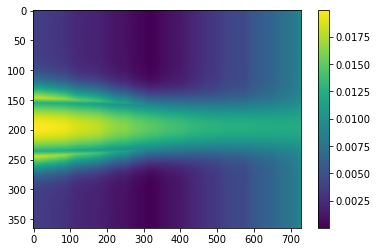

In [190]:
plt.imshow(daily_accum, aspect='auto'); 
plt.colorbar()

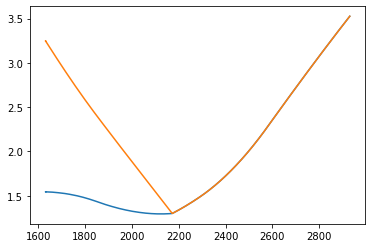

In [191]:
# plt.plot(glc1a_zs, snow_melt_rate.sum(0))
# plt.plot(glc1a_zs, ice_melt_rate.sum(0))

# plt.plot(glc1a_zs, daily_melt.sum(0) )
# plt.plot(glc1a_zs, melt_rate.sum(0) )
plt.plot(glc1a_zs, daily_accum_new.sum(0))
plt.plot(glc1a_zs, daily_accum.sum(0))
# plt.plot(glc1a_zs, melt_rate.sum(0))
# plt.plot(glc1a_zs, kmr_mb + daily_melt.sum(0))
# plt.plot(glc1a_zs, snow_depth.sum(0))

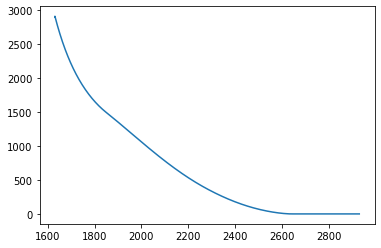

In [126]:
plt.plot(glc1a_zs, (ice_melt_rate/snow_melt_rate).sum(0))

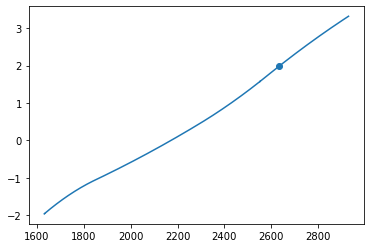

In [48]:
plt.plot(glc1a_zs, kmr_mb)
plt.scatter(glc1a_zs[idx], kmr_mb[idx])
# plt.plot(glc1a_zs, glc1a_melt)
# plt.plot(glc1a_zs, kmr_mb + glc1a_melt)

In [ ]:
plt.imshow((kmr_mb + 3e-3 *glc1a_PDDs)), plt.colorbar()